In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('LQL_features')
data[data['label']==0]

,Sequence,label,A,C,D,E,F,G,H,I,...,P_11,P_12,P_13,P_14,P_15,P_16,P_17,P_18,P_19,P_20
0,AACKCDDEGPDIRTAPLTGTVDLGSCNAGWEKCASYYTIIADCCRKKK,0.0,0.125000,0.125000,0.104167,0.041667,0.000000,0.083333,0.000000,0.062500,...,0.187500,0.291667,0.416667,0.520833,0.791667,0.083333,0.166667,0.333333,0.666667,1.000000
1,AADAPAQLDPAGEKLYRSACVVCHASGVANAPKLGDKQAWAPFLAQ...,0.0,0.275862,0.022989,0.068966,0.022989,0.011494,0.091954,0.011494,0.000000,...,0.080460,0.275862,0.436782,0.666667,0.850575,0.034483,0.160920,0.425287,0.735632,1.000000
2,AAKKTVTKADLVDQVAQATGLKKKDVKAMVDALLAKVEEALANGSK...,0.0,0.145833,0.000000,0.052083,0.041667,0.031250,0.072917,0.000000,0.020833,...,0.052083,0.197917,0.520833,0.677083,0.906250,0.031250,0.260417,0.614583,0.781250,1.000000
3,AAMKVYDVTAPIYEGMPVYKNKPEKQPKRTTITNGYVTESRIDMDV...,0.0,0.091787,0.004831,0.086957,0.067633,0.057971,0.072464,0.038647,0.072464,...,0.043478,0.231884,0.405797,0.705314,0.932367,0.019324,0.207729,0.473430,0.734300,1.000000
4,AAPANAVTADDPTAIALKYNQDATKSERVAAARPGLPPEEQHCANC...,0.0,0.180723,0.048193,0.048193,0.048193,0.024096,0.084337,0.012048,0.024096,...,0.096386,0.289157,0.566265,0.746988,1.000000,0.036145,0.216867,0.409639,0.662651,0.975904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,YCQKWMWTCDEERKCCEGLVCRLWCKRIINM,0.0,0.000000,0.193548,0.032258,0.096774,0.000000,0.032258,0.000000,0.064516,...,0.096774,0.258065,0.580645,0.129032,0.322581,0.419355,0.709677,0.967742,NaN,NaN
5246,YKLICYYTSWSQYREGDGSCFPDAIDPFLCTHVIYSFANISNNEID...,0.0,0.088643,0.013850,0.066482,0.036011,0.058172,0.074792,0.024931,0.044321,...,0.022161,0.257618,0.520776,0.714681,0.975069,0.005540,0.227147,0.459834,0.745152,0.997230
5247,YNRLCIKPRDWIDECDSNEGGERAYFRNGKGGCDSFWICPEDHTGA...,0.0,0.050000,0.100000,0.116667,0.066667,0.050000,0.100000,0.016667,0.066667,...,0.283333,0.350000,0.533333,0.733333,0.850000,0.033333,0.166667,0.366667,0.666667,0.950000
5248,YTPNDPYFSSRQYGPQKIQAPQAWDIAEGSGAKIAIVDTGVQSNHP...,0.0,0.157706,0.003584,0.046595,0.007168,0.010753,0.118280,0.014337,0.050179,...,0.007168,0.254480,0.487455,0.759857,0.996416,0.010753,0.168459,0.419355,0.677419,0.985663


In [48]:
X = data.copy()
X.drop(columns = ['Sequence','label'], inplace = True)
X[X.columns] = X[X.columns].apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.mean(), axis=0)
X = X.to_numpy()
y = data['label'].to_numpy()

#### Imbalanced dataset
https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html
- Use the F1-score as evaluation metrics

#### Split train and test dataset

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Use SVM to train the data

In [84]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Try linear kernel
Cs = np.linspace(1,1e4,10)
scores = []
for C in Cs:
    clf = svm.SVC(kernel='linear', C=C, random_state=42)
    s = cross_val_score(clf, X_train, y_train, cv=10,scoring='f1').mean()
    scores.append(s)

In [85]:
best_C = Cs[scores.index(max(scores))]
print("best_C:", best_C, "best_f1:",max(scores))

best_C: 10000.0 best_f1: 0.8588165994018375


In [69]:
# rbf kernel
Cs = np.linspace(1e-2,1e2,8)
gammas = np.linspace(1e-2,1e2,8)
scores = np.zeros((8,8))
for i,C in enumerate(Cs):
    for j,gamma in enumerate(gammas):
        clf = svm.SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        scores[i,j] = cross_val_score(clf, X_train, y_train, cv=10,scoring='f1').mean()

In [70]:
scores

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.63242465, 0.80699759, 0.70190616, 0.64825292, 0.62421553,
        0.60570947, 0.59713805, 0.59301106],
       [0.68179987, 0.79985253, 0.70190616, 0.64825292, 0.62421553,
        0.60570947, 0.59713805, 0.59301106],
       [0.72827498, 0.79985253, 0.70190616, 0.64825292, 0.62421553,
        0.60570947, 0.59713805, 0.59301106],
       [0.77057252, 0.79985253, 0.70190616, 0.64825292, 0.62421553,
        0.60570947, 0.59713805, 0.59301106],
       [0.79326562, 0.79985253, 0.70190616, 0.64825292, 0.62421553,
        0.60570947, 0.59713805, 0.59301106],
       [0.7970582 , 0.79985253, 0.70190616, 0.64825292, 0.62421553,
        0.60570947, 0.59713805, 0.59301106],
       [0.80145835, 0.79985253, 0.70190616, 0.64825292, 0.62421553,
        0.60570947, 0.59713805, 0.59301106]])

In [83]:
best_index = np.unravel_index(scores.argmax(), scores.shape)
best_C = Cs[best_index[0]]
best_gamma = gammas[best_index[1]]
print("best_C:", best_C,"best_gamma:", best_gamma, "best_f1:", np.max(scores))

best_C: 14.294285714285714 best_gamma: 14.294285714285714 best_f1: 0.8069975922219752


In [9]:
# PCA on original data
from sklearn.decomposition import PCA

X = data.copy()
X.drop(columns = ['Sequence','label'], inplace = True)
X[X.columns] = X[X.columns].apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.mean(), axis=0)
pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.27418562 0.180301   0.15755709]


In [10]:
X_pca = pca.transform(X)
X_pca.shape

(5603, 3)

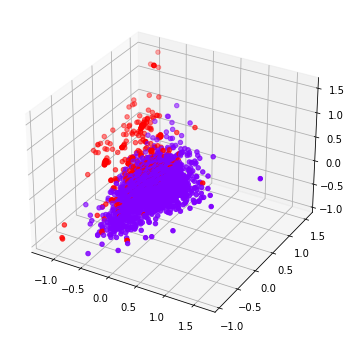

In [13]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,1],c=data['label'],cmap='rainbow')

Text(0, 0.5, 'Second Principal Component')

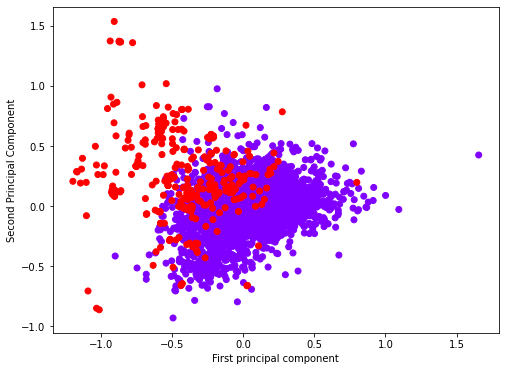

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=data['label'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')